# Analisis del dataset

In [4]:
# Import the required packages
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

## Read Data

In [5]:
train_df = pd.read_csv("../data/travel_insurance_prediction_train.csv")
test_df = pd.read_csv("../data/travel_insurance_prediction_test.csv")

## Explore the Data

Is your task to explore the data, do analysis over it and get insights, then use those insights to better pick a model. **Solo enfocandose en el conjunto de entrenamiento**

In [6]:
train_df.head()

,Customer,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,1,33,Private Sector/Self Employed,Yes,550000,6,0,No,No,1
1,2,28,Private Sector/Self Employed,Yes,800000,7,0,Yes,No,0
2,3,31,Private Sector/Self Employed,Yes,1250000,4,0,No,No,0
3,4,31,Government Sector,No,300000,7,0,No,No,0
4,5,28,Private Sector/Self Employed,Yes,1250000,3,0,No,No,0


In [7]:
columns = np.delete(train_df.columns.to_numpy(), 0)
 
for column in columns:
    print(f'> getting unique values for column: {column} ')
    print(train_df[column].unique(), '\n')

> getting unique values for column: Age 
[33 28 31 25 26 35 27 34 32 29 30] 

> getting unique values for column: Employment Type 
['Private Sector/Self Employed' 'Government Sector'] 

> getting unique values for column: GraduateOrNot 
['Yes' 'No'] 

> getting unique values for column: AnnualIncome 
[ 550000  800000 1250000  300000 1350000  400000  500000 1150000  750000
  850000 1450000  700000 1050000  350000 1100000  900000 1200000 1300000
 1400000 1000000 1500000  450000  600000  650000 1750000 1700000 1550000
  950000 1800000 1650000] 

> getting unique values for column: FamilyMembers 
[6 7 4 3 5 2 8 9] 

> getting unique values for column: ChronicDiseases 
[0 1] 

> getting unique values for column: FrequentFlyer 
['No' 'Yes'] 

> getting unique values for column: EverTravelledAbroad 
['No' 'Yes'] 

> getting unique values for column: TravelInsurance 
[1 0] 



In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer             1490 non-null   int64 
 1   Age                  1490 non-null   int64 
 2   Employment Type      1490 non-null   object
 3   GraduateOrNot        1490 non-null   object
 4   AnnualIncome         1490 non-null   int64 
 5   FamilyMembers        1490 non-null   int64 
 6   ChronicDiseases      1490 non-null   int64 
 7   FrequentFlyer        1490 non-null   object
 8   EverTravelledAbroad  1490 non-null   object
 9   TravelInsurance      1490 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 116.5+ KB


**Observaciones**: Podemos notar que, aunque `EmploymentType`, `GraduateOrNot` `FrequentFlyer` y `EverTravelledAbroad` son strings, pueden ser tranquilamente transformadas a variables booleanas (categorica con solo 2 categorias).

In [9]:
# Defining columns by variable type

categorical_columns = ['Employment Type', 'GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad']
numeric_columns = ['Age', 'AnnualIncome', 'FamilyMembers']

## Variables categoricas

In [10]:
# Converting 'ChronicDiseases' to categorical
train_df['ChronicDiseases'] = train_df['ChronicDiseases'].astype('category')
train_df[categorical_columns].describe()

,Employment Type,GraduateOrNot,ChronicDiseases,FrequentFlyer,EverTravelledAbroad
count,1490,1490,1490,1490,1490
unique,2,2,2,2,2
top,Private Sector/Self Employed,Yes,0,No,No
freq,1057,1268,1079,1173,1202


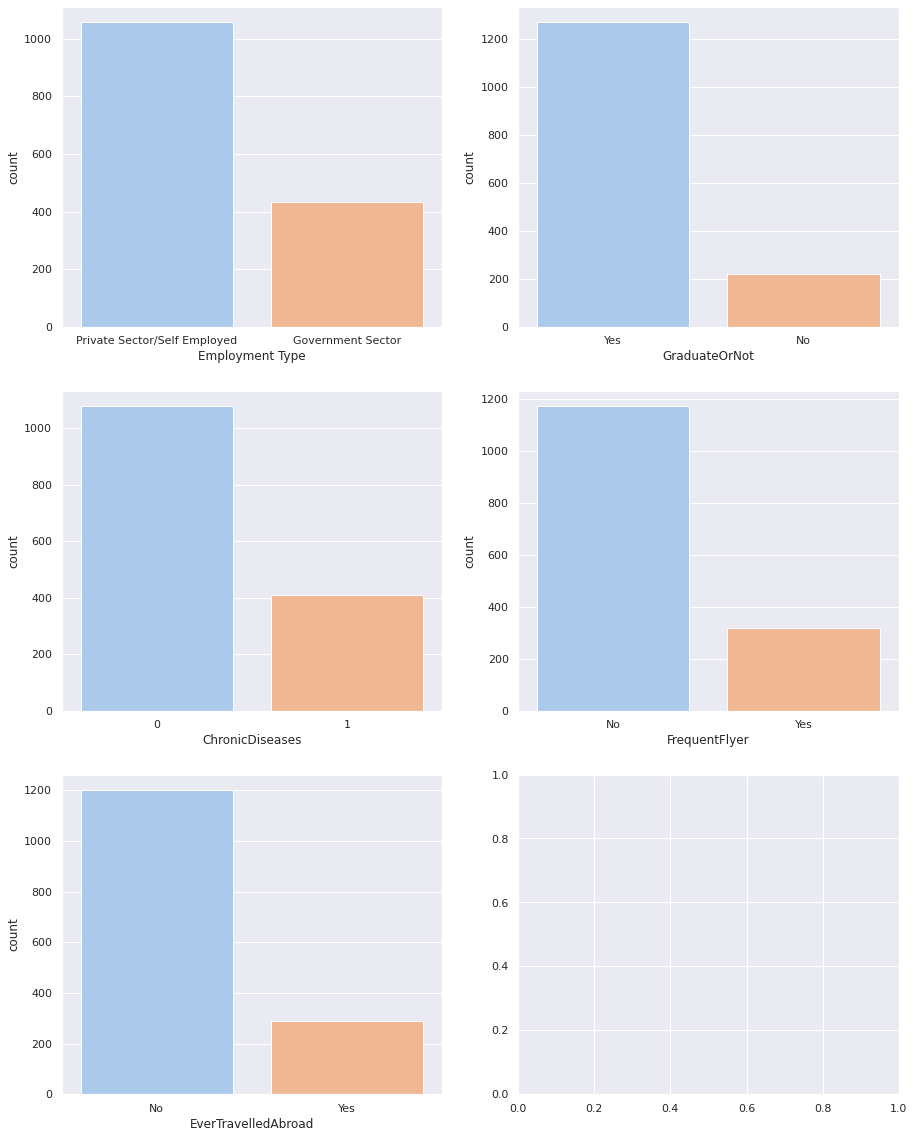

In [14]:
rows = 3
cols = 2

fig, axes = plt.subplots(rows, cols, figsize=(15,20))
row_index, col_index = 0,0

sb.set_theme(style="darkgrid", palette="pastel")
for i, feature in enumerate(categorical_columns):
    sb.countplot(x=feature, data=train_df, ax=axes[row_index][col_index])
    col_index += 1
    if (col_index == 2):
        col_index = 0
        row_index +=1 

## Variables numericas

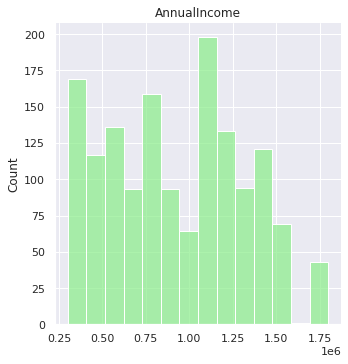

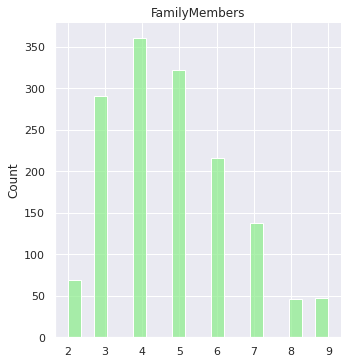

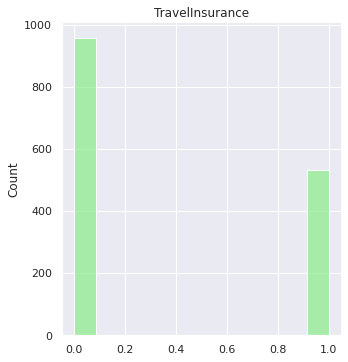

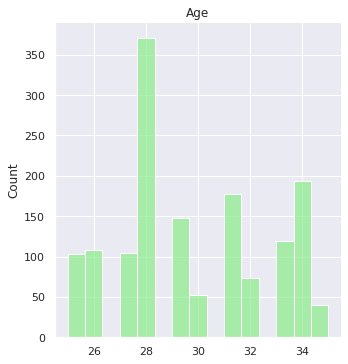

In [28]:
numeric_columns.append('TravelInsurance')
numeric_columns = list(set(numeric_columns))

for column in numeric_columns:
    sb.displot(train_df[column].values, color='lightgreen')
    plt.title(column)

## Correlacion: variables numericas

In [31]:
numeric_columns.append('TravelInsurance')
numeric_plus_target = set(numeric_columns)

train_numeric = train_df[list(numeric_plus_target)]
correlation_num= train_numeric.corr() 
correlation_num

,AnnualIncome,FamilyMembers,TravelInsurance,Age
AnnualIncome,1.000000,-0.018384,0.395549,-0.016513
FamilyMembers,-0.018384,1.000000,0.081617,0.004190
TravelInsurance,0.395549,0.081617,1.000000,0.068138
Age,-0.016513,0.004190,0.068138,1.000000


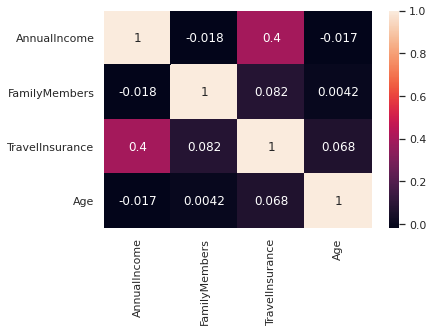

In [32]:
sb.heatmap(correlation_num, annot=True);

### Conteo de Seguros por variable `FamilyMembers`

/home/cactus/.anaconda3/envs/diplodatos/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='FamilyMembers', ylabel='count'>

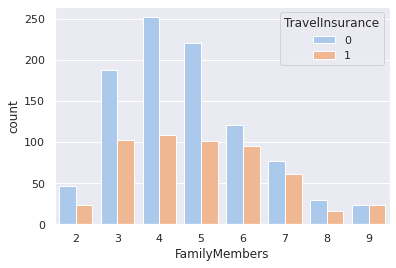

In [15]:
## poner codigo aqui
sb.countplot('FamilyMembers', hue='TravelInsurance', data=train_df)


**Observaciones** Se puede notar que en los casos con 3, 4 y 5 miembros la contratacion del seguro es casi una relacion 2 a 1.

## Baseline

In this section we present a baseline based on a decision tree classifier.

Many of the attributes are binary, there are a couple of numeric attributes, we might be able to one-hot (e.g. family members), or event discretize (age and anual income), this will come more clearly after the EDA.

In [42]:
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier

### Transform the columns into features

First we need to transform the columns into features. The type of features we use will have a direct impact on the final result. In this example we decided to discretize some numeric features and make a one hot encoding of others. The number of bins, what we use as a one hot encoding, etc, is all up to you to try it out.

In [43]:
transformer = make_column_transformer(
    (KBinsDiscretizer(n_bins=5, encode="ordinal", strategy="quantile"), ["Age", "AnnualIncome"]),
    (OneHotEncoder(categories="auto", dtype="int", handle_unknown="ignore"),
     ["Employment Type", "GraduateOrNot", "FamilyMembers", "FrequentFlyer", "EverTravelledAbroad"]),
    remainder="passthrough")

We transform the train and test data. In order to avoid overfitting is better to remove the `Customer` column and we don't want the `TravelInsurance` column as part of the attributes either.

In [47]:
# The data for training the model
X_train = transformer.fit_transform(train_df.drop(columns=["Customer", "TravelInsurance"]))
y_train = train_df["TravelInsurance"].values

print(type(X_train))
# The test data is only for generating the submission
X_test = transformer.transform(test_df.drop(columns=["Customer"]))

<class 'numpy.ndarray'>


### Grid Search

We do a Grid Search for the Decision Tree (this can be replaced by a randomized search if the model is too complex).

In [13]:
search_params = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [1, 2, 5],
    'max_depth': [3, 6, 10]
}
tree = DecisionTreeClassifier(random_state=42)
tree_clf = GridSearchCV(tree, search_params, cv=5, scoring='f1', n_jobs=-1)
tree_clf.fit(X_train, y_train)

best_tree_clf = tree_clf.best_estimator_


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       random_state=42)

### Check Results

We can print the results of the best estimator found on the whole training set (we could also set apart a validation set if we find it useful).

In [14]:
print(classification_report(y_train, best_tree_clf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88       958
           1       0.86      0.66      0.75       532

    accuracy                           0.84      1490
   macro avg       0.85      0.80      0.82      1490
weighted avg       0.84      0.84      0.84      1490



## Generate the output

The last thing we do is generating a file that should be *submitted* on kaggle

In [16]:
test_id = test_df["Customer"]
test_pred = best_tree_clf.predict(X_test)

submission = pd.DataFrame(list(zip(test_id, test_pred)), columns=["Customer", "TravelInsurance"])
submission.to_csv("../data/travel_insurance_submission.csv", header=True, index=False)